## Organizações não governamentais de ambiente por 100 000 habitantes (N.º) por Localização geográfica (NUTS - 2013); Anual
https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_indicadores&indOcorrCod=0008290&contexto=bd&selTab=tab2

### Base de dados: Nuts 2013

### Sinais convencionais
Sinais convencionais por ausência de valor
- `…`	Dado confidencial
- `-`	Dado nulo ou não aplicável
- `x`	Dado não disponível
- `o`	Dado inferior a metade do módulo da unidade utilizada
- `∞`	Infinito

Sinais convencionais adicionais ao valor
- `//` Dado preliminar
- `&`	Dado provisório
- `»`	Dado previsto
- `*`	Dado rectificado
- `§`	Desvio do padrão de qualidade/Coeficiente de variação elevado
- `“`	Estimativa
- `“E` Dado estimado pelo Eurostat
- `┴`	Quebra de série/comparabilidade
- `i`	Mais informação em anexo

## Sinais convencionais diversos
- `µ`	Média
- `=`	Igual
- `>`	Maior que
- `≥`	Maior ou igual
- `<`	Menor que
- `≤`	Menor ou igual
- `%`	Percentagem
- `‰`	Permilagem
- `∑`	Soma de
- `≠`	Diferente

In [64]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data, drop all the non used rows, 

In [65]:
data=pd.read_csv("Data/ine_principais_culturas_agricolas.csv",delimiter=";", encoding="latin-1", header=[4, 6], nrows=12, on_bad_lines="skip")
data

,Unnamed: 0_level_0,2021,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 3412_level_0,Unnamed: 3413_level_0,Unnamed: 3414_level_0,Unnamed: 3415_level_0,Unnamed: 3416_level_0,Unnamed: 3417_level_0,Unnamed: 3418_level_0,Unnamed: 3419_level_0,Unnamed: 3420_level_0,Unnamed: 3421_level_0
,Unnamed: 0_level_1,Cereais para grão,Trigo,Trigo mole,Trigo duro,Centeio,Aveia,Cevada,Triticale,Milho,...,Vinha,Uva para vinho,Uva para vinho (DOP),Uva para vinho (IGP),Uva para vinho (Vinhos sem certificação),Uva de mesa,Olival,Azeitona de mesa,Azeitona para azeite,Unnamed: 3421_level_1
0,NaN,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,...,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,NaN
1,PT: Portugal,5372,2342,2272,2734,1142,1213,2901,1467,10105,...,4199,4122,x x,x x,x x,6720,1048,1961,1018,NaN
2,1: Continente,5373,2342,2272,2734,1142,1213,2901,1467,10110,...,4124,4046,x x,x x,x x,6720,1048,1961,1018,NaN
3,11: Norte,3632,1689,1689,- -,1405,990,994,1511,5190,...,3853,3852,x x,x x,x x,4924,1463,2777,1380,NaN
4,16: Centro,6609,1934,1893,2460,712,858,3027,1087,9931,...,4153,4047,x x,x x,x x,8552,1155,1546,1143,NaN
5,17: Área Metropolitana de Lisboa,7356,3803,3911,2955,- -,1490,3648,2298,13201,...,4184,4040,x x,x x,x x,7580,110,- -,110,NaN
6,18: Alentejo,5386,2492,2425,2800,911,1307,2974,1483,13845,...,4713,4777,x x,x x,x x,3948,772,1552,753,NaN
7,15: Algarve,1609,1107,1071,1254,641,863,902,811,9120,...,4947,2266,x x,x x,x x,8674,1980,774,2027,NaN
8,2: Região Autónoma dos Açores,2375,- -,- -,- -,- -,- -,- -,- -,2375,...,2936750,- -,x x,x x,x x,6750,- -,- -,- -,NaN


In [66]:
data.drop(labels=[0], inplace=True) # Drop first row
data.drop(columns=data.columns[-1], inplace=True) # Drop last column
data.drop(labels=[9,11], inplace=True) # Drop repeated Açores and Madeira rows
data

,Unnamed: 0_level_0,2021,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 3411_level_0,Unnamed: 3412_level_0,Unnamed: 3413_level_0,Unnamed: 3414_level_0,Unnamed: 3415_level_0,Unnamed: 3416_level_0,Unnamed: 3417_level_0,Unnamed: 3418_level_0,Unnamed: 3419_level_0,Unnamed: 3420_level_0
,Unnamed: 0_level_1,Cereais para grão,Trigo,Trigo mole,Trigo duro,Centeio,Aveia,Cevada,Triticale,Milho,...,Avelã,Vinha,Uva para vinho,Uva para vinho (DOP),Uva para vinho (IGP),Uva para vinho (Vinhos sem certificação),Uva de mesa,Olival,Azeitona de mesa,Azeitona para azeite
1,PT: Portugal,5372,2342,2272,2734,1142,1213,2901,1467,10105,...,1334,4199,4122,x x,x x,x x,6720,1048,1961,1018
2,1: Continente,5373,2342,2272,2734,1142,1213,2901,1467,10110,...,1334,4124,4046,x x,x x,x x,6720,1048,1961,1018
3,11: Norte,3632,1689,1689,- -,1405,990,994,1511,5190,...,1453,3853,3852,x x,x x,x x,4924,1463,2777,1380
4,16: Centro,6609,1934,1893,2460,712,858,3027,1087,9931,...,1283,4153,4047,x x,x x,x x,8552,1155,1546,1143
5,17: Área Metropolitana de Lisboa,7356,3803,3911,2955,- -,1490,3648,2298,13201,...,555,4184,4040,x x,x x,x x,7580,110,- -,110
6,18: Alentejo,5386,2492,2425,2800,911,1307,2974,1483,13845,...,1305,4713,4777,x x,x x,x x,3948,772,1552,753
7,15: Algarve,1609,1107,1071,1254,641,863,902,811,9120,...,1000,4947,2266,x x,x x,x x,8674,1980,774,2027
8,2: Região Autónoma dos Açores,2375,- -,- -,- -,- -,- -,- -,- -,2375,...,- -,2936750,- -,x x,x x,x x,6750,- -,- -,- -
10,3: Região Autónoma da Madeira,2446,2002,2002,- -,- -,- -,- -,- -,3056,...,- -,307306,- -,x x,x x,x x,6720,- -,- -,- -


## Reset of the Index as Region with just the region codes

In [67]:
data[["Region", "Region_names"]] = data[data.columns[0]].str.split(
    ":",
    expand=True,
)
region_names = data["Region_names"].to_list()
data.set_index("Region", inplace=True)
columns_to_rem = [0, -1, -2]
data.drop(data.columns[columns_to_rem], axis=1, inplace=True)
data

,2021,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0,...,Unnamed: 3410_level_0,Unnamed: 3411_level_0,Unnamed: 3412_level_0,Unnamed: 3413_level_0,Unnamed: 3414_level_0,Unnamed: 3415_level_0,Unnamed: 3416_level_0,Unnamed: 3417_level_0,Unnamed: 3418_level_0,Unnamed: 3419_level_0
,Cereais para grão,Trigo,Trigo mole,Trigo duro,Centeio,Aveia,Cevada,Triticale,Milho,Milho regadio,...,Noz,Avelã,Vinha,Uva para vinho,Uva para vinho (DOP),Uva para vinho (IGP),Uva para vinho (Vinhos sem certificação),Uva de mesa,Olival,Azeitona de mesa
Region,,,,,,,,,,,,,,,,,,,,,
PT,5372,2342,2272,2734,1142,1213,2901,1467,10105,10925,...,2000,1334,4199,4122,x x,x x,x x,6720,1048,1961
1,5373,2342,2272,2734,1142,1213,2901,1467,10110,10926,...,2000,1334,4124,4046,x x,x x,x x,6720,1048,1961
11,3632,1689,1689,- -,1405,990,994,1511,5190,5982,...,1039,1453,3853,3852,x x,x x,x x,4924,1463,2777
16,6609,1934,1893,2460,712,858,3027,1087,9931,10909,...,2097,1283,4153,4047,x x,x x,x x,8552,1155,1546
17,7356,3803,3911,2955,- -,1490,3648,2298,13201,13201,...,2455,555,4184,4040,x x,x x,x x,7580,110,- -
18,5386,2492,2425,2800,911,1307,2974,1483,13845,13845,...,3173,1305,4713,4777,x x,x x,x x,3948,772,1552
15,1609,1107,1071,1254,641,863,902,811,9120,12261,...,1897,1000,4947,2266,x x,x x,x x,8674,1980,774
2,2375,- -,- -,- -,- -,- -,- -,- -,2375,- -,...,- -,- -,2936750,- -,x x,x x,x x,6750,- -,- -


## Redo the headers

In [68]:
c0 = data.columns.get_level_values(0).to_series()
c1 = list(data.columns.get_level_values(1).to_series())
c0 = c0.mask(lambda c: c.str.startswith("Unnamed")).ffill()
data.columns = [c0, c1]
data

2021                                                   \
       Cereais para grão Trigo Trigo mole Trigo duro Centeio Aveia Cevada   
Region                                                                      
PT                  5372  2342       2272       2734    1142  1213   2901   
1                   5373  2342       2272       2734    1142  1213   2901   
11                  3632  1689       1689        - -    1405   990    994   
16                  6609  1934       1893       2460     712   858   3027   
17                  7356  3803       3911       2955     - -  1490   3648   
18                  5386  2492       2425       2800     911  1307   2974   
15                  1609  1107       1071       1254     641   863    902   
2                   2375   - -        - -        - -     - -   - -    - -   
3                   2446  2002       2002        - -     - -   - -    - -   

                                       ...  1986                 \
       Triticale  Milho Milho regadio  ...   Noz Avelã    Vinha   
Region                                 ...                        
PT          1467  10105         10925  ...  2000  1334     4199   
1           1467  10110         10926  ...  2000  1334     4124   
11          1511   5190          5982  ...  1039  1453     3853   
16          1087   9931         10909  ...  2097  1283     4153   
17          2298  13201         13201  ...  2455   555     4184   
18          1483  13845         13845  ...  3173  1305     4713   
15           811   9120         12261  ...  1897  1000     4947   
2            - -   2375           - -  ...   - -   - -  2936750   
3            - -   3056          3056  ...   - -   - -   307306   

                                                                 \
       Uva para vinho Uva para vinho (DOP) Uva para vinho (IGP)   
Region                                                            
PT               4122                  x x                  x x   
1                4046                  x x                  x x   
11               3852                  x x                  x x   
16               4047                  x x                  x x   
17               4040                  x x                  x x   
18               4777                  x x                  x x   
15               2266                  x x                  x x   
2                 - -                  x x                  x x   
3                 - -                  x x                  x x   

                                                                    \
       Uva para vinho (Vinhos sem certificação) Uva de mesa Olival   
Region                                                               
PT                                          x x        6720   1048   
1                                           x x        6720   1048   
11                                          x x        4924   1463   
16                                          x x        8552   1155   
17                                          x x        7580    110   
18                                          x x        3948    772   
15                                          x x        8674   1980   
2                                           x x        6750    - -   
3                                           x x        6720    - -   

                         
       Azeitona de mesa  
Region                   
PT                 1961  
1                  1961  
11                 2777  
16                 1546  
17                  - -  
18                 1552  
15                  774  
2                   - -  
3                   - -  

[9 rows x 3419 columns]

## Bring the year to the index

In [69]:
data = data.stack(level=0)
data.index.names=['Region', 'year']
data

Abacate Abóbora (inclui butternut) Alface Alho Alho-porro Ameixa  \
Region year                                                                    
PT     1986       x                          x    x x    x          x   6006   
       1987       x                          x    x x    x          x   6266   
       1988       x                          x    x x    x          x   5173   
       1989       x                          x    x x    x          x   5769   
       1990       x                          x    x x    x          x   6436   
...             ...                        ...    ...  ...        ...    ...   
3      2017     x x                        x x    x x  x x        x x   7529   
       2018     - -                        x x    x x  x x        x x   7760   
       2019    8243                        x x    x x  x x        x x   8339   
       2020    9164                        x x    x x  x x        x x   5880   
       2021    9726                        x x    x x  x x        x x   5018   

            Amoras Amêndoa Ananás Arroz  ... Trigo Trigo duro Trigo mole  \
Region year                              ...                               
PT     1986    x x     848    x x  4463  ...  1630       1250       1669   
       1987    x x     996    x x  4322  ...  1694       1355       1727   
       1988    x x     506    x x  4266  ...  1380        789       1425   
       1989    x x    1237    x x  4290  ...  1915       1197       1977   
       1990    x x    1098    x x  4614  ...  1429       1270       1445   
...            ...     ...    ...   ...  ...   ...        ...        ...   
3      2017    x x     - -    - -   - -  ...  1986        - -       1986   
       2018    - -     - -    - -   - -  ...  1986        - -       1986   
       2019    - -     - -    - -   - -  ...  2002        - -       2002   
       2020    - -     - -    - -   - -  ...  1988        - -       1988   
       2021    - -     - -    - -   - -  ...  2002        - -       2002   

            Triticale Uva de mesa Uva para vinho Uva para vinho (DOP)  \
Region year                                                             
PT     1986      1405        6720           4122                  x x   
       1987      1410        7702           5765                  x x   
       1988      1237        3179           1965                  x x   
       1989      1666        5517           3963                  x x   
       1990      1244        5740           5806                  x x   
...               ...         ...            ...                  ...   
3      2017       - -        7881         5490 &                  x x   
       2018       - -        7881           4386                  x x   
       2019       - -        7881           6224                  x x   
       2020       - -        7883           5980                  x x   
       2021       - -        7883         6474 &                  x x   

            Uva para vinho (IGP) Uva para vinho (Vinhos sem certificação)  \
Region year                                                                 
PT     1986                  x x                                      x x   
       1987                  x x                                      x x   
       1988                  x x                                      x x   
       1989                  x x                                      x x   
       1990                  x x                                      x x   
...                          ...                                      ...   
3      2017                  x x                                      x x   
       2018                  x x                                      x x   
       2019                  x x                                      x x   
       2020                  x x                                      x x   
       2021                  x x                                      x x   

              Vinha  
Region y

## Replacing values

In [70]:
# Replacing 'x', 'x x', '- -' for their respective value
data.replace({'x':np.nan,'x x':np.nan,'- -':0,'nan':np.nan},inplace=True)
# Replacing provisional data 
for column in data:
    data[column]=data[column].map(lambda x: str(x).rstrip(' &'))
    data[column]=data[column].map(lambda x: str(x).rstrip(' *'))

# This method turns data to stringd so we have to turn the data back to numeric

In [71]:
for column in data:
    data[column]=pd.to_numeric(data[column],'coerce')

data

Abacate  Abóbora (inclui butternut)  Alface  Alho  Alho-porro  \
Region year                                                                  
PT     1986      NaN                         NaN     NaN   NaN         NaN   
       1987      NaN                         NaN     NaN   NaN         NaN   
       1988      NaN                         NaN     NaN   NaN         NaN   
       1989      NaN                         NaN     NaN   NaN         NaN   
       1990      NaN                         NaN     NaN   NaN         NaN   
...              ...                         ...     ...   ...         ...   
3      2017      NaN                         NaN     NaN   NaN         NaN   
       2018      0.0                         NaN     NaN   NaN         NaN   
       2019   8243.0                         NaN     NaN   NaN         NaN   
       2020   9164.0                         NaN     NaN   NaN         NaN   
       2021   9726.0                         NaN     NaN   NaN         NaN   

             Ameixa  Amoras  Amêndoa  Ananás  Arroz  ...  Trigo  Trigo duro  \
Region year                                          ...                      
PT     1986    6006     NaN      848     NaN   4463  ...   1630        1250   
       1987    6266     NaN      996     NaN   4322  ...   1694        1355   
       1988    5173     NaN      506     NaN   4266  ...   1380         789   
       1989    5769     NaN     1237     NaN   4290  ...   1915        1197   
       1990    6436     NaN     1098     NaN   4614  ...   1429        1270   
...             ...     ...      ...     ...    ...  ...    ...         ...   
3      2017    7529     NaN        0     0.0      0  ...   1986           0   
       2018    7760     0.0        0     0.0      0  ...   1986           0   
       2019    8339     0.0        0     0.0      0  ...   2002           0   
       2020    5880     0.0        0     0.0      0  ...   1988           0   
       2021    5018     0.0        0     0.0      0  ...   2002           0   

             Trigo mole  Triticale  Uva de mesa  Uva para vinho  \
Region year                                                       
PT     1986        1669       1405         6720            4122   
       1987        1727       1410         7702            5765   
       1988        1425       1237         3179            1965   
       1989        1977       1666         5517            3963   
       1990        1445       1244         5740            5806   
...                 ...        ...          ...             ...   
3      2017        1986          0         7881            5490   
       2018        1986          0         7881            4386   
       2019        2002          0         7881            6224   
       2020        1988          0         7883            5980   
       2021        2002          0         7883            6474   

             Uva para vinho (DOP)  Uva para vinho (IGP)  \
Region year                                               
PT     1986                   NaN                   NaN   
       1987                   NaN                   NaN   
       1988                   NaN                   NaN   
       1989                   NaN                   NaN   
       1990                   NaN                   NaN   
...                           ...                   ...   
3      2017                   NaN                   NaN   
       2018                   NaN                   NaN   
       2019                   NaN                   NaN   
       2020                   NaN                   NaN   
       2021                   NaN                   NaN   

             Uva para vinho (Vinhos sem certificação)  Vinha  
Region year                                                   
PT     1986                                       NaN   4199  
       1987                                       NaN   5824  
       1988                                       NaN   2002  
       1989    

## Creating a few graphs
- https://www.w3schools.com/python/pandas/pandas_plotting.asp
Mas que raio lisboa tem a mania que é grande ... alterar de "Área metropolitana de Lisboa" para "Lisboa" apenas ... poderei "Alfacinhas"

In [72]:
data.columns[0]

'Abacate'

In [73]:
region_names[4] = "Lisboa"

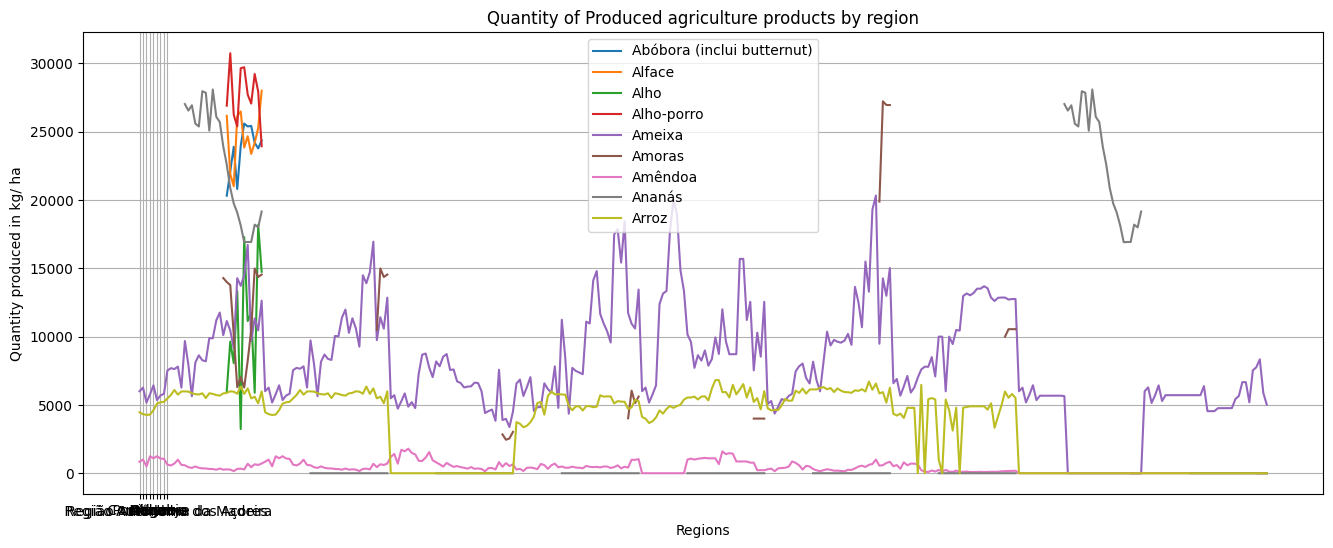

In [74]:
data[data.columns[1:10]] = data[data.columns[1:10]].astype(float)
data[data.columns[1:10]].plot(figsize=(16, 6))
plt.title("Quantity of Produced agriculture products by region")
plt.xlabel("Regions")
plt.ylabel("Quantity produced in kg/ ha")
plt.grid()
plt.xticks(range(len(region_names)), region_names)
plt.show()

In [75]:
data.T

Region                                        PT                          \
year                                        1986    1987    1988    1989   
Abacate                                      NaN     NaN     NaN     NaN   
Abóbora (inclui butternut)                   NaN     NaN     NaN     NaN   
Alface                                       NaN     NaN     NaN     NaN   
Alho                                         NaN     NaN     NaN     NaN   
Alho-porro                                   NaN     NaN     NaN     NaN   
...                                          ...     ...     ...     ...   
Uva para vinho                            4122.0  5765.0  1965.0  3963.0   
Uva para vinho (DOP)                         NaN     NaN     NaN     NaN   
Uva para vinho (IGP)                         NaN     NaN     NaN     NaN   
Uva para vinho (Vinhos sem certificação)     NaN     NaN     NaN     NaN   
Vinha                                     4199.0  5824.0  2002.0  4014.0   

Region                                                                    \
year                                        1990    1991    1992    1993   
Abacate                                      NaN     NaN     NaN     NaN   
Abóbora (inclui butternut)                   NaN     NaN     NaN     NaN   
Alface                                       NaN     NaN     NaN     NaN   
Alho                                         NaN     NaN     NaN     NaN   
Alho-porro                                   NaN     NaN     NaN     NaN   
...                                          ...     ...     ...     ...   
Uva para vinho                            5806.0  5008.0  3987.0  2550.0   
Uva para vinho (DOP)                         NaN     NaN     NaN     NaN   
Uva para vinho (IGP)                         NaN     NaN     NaN     NaN   
Uva para vinho (Vinhos sem certificação)     NaN     NaN     NaN     NaN   
Vinha                                     5803.0  5036.0  4039.0  2657.0   

Region                                                    ...       3          \
year                                        1994    1995  ...    2012    2013   
Abacate                                      NaN     NaN  ...     NaN     NaN   
Abóbora (inclui butternut)                   NaN     NaN  ...     NaN     NaN   
Alface                                       NaN     NaN  ...     NaN     NaN   
Alho                                         NaN     NaN  ...     NaN     NaN   
Alho-porro                                   NaN     NaN  ...     NaN     NaN   
...                                          ...     ...  ...     ...     ...   
Uva para vinho                            3528.0  4010.0  ...  5286.0  4551.0   
Uva para vinho (DOP)                         NaN     NaN  ...     NaN     NaN   
Uva para vinho (IGP)                         NaN     NaN  ...     NaN     NaN   
Uva para vinho (Vinhos sem certificação)     NaN     NaN  ...     NaN     NaN   
Vinha                                     3633.0  4124.0  ...  5300.0  4567.0   

Region                                                                    \
year                                        2014    2015    2016    2017   
Abacate                                      NaN     NaN     NaN     NaN   
Abóbora (inclui butternut)                   NaN     NaN     NaN     NaN   
Alface                                       NaN     NaN     NaN     NaN   
Alho                                         NaN     NaN     NaN     NaN   
Alho-porro                                   NaN     NaN     NaN     NaN   
...                                          ...     ...     ...     ...   
Uva para vinho                            4819.0  5403.0  3930.0  5490.0   
Uva para vinho (DOP)                         NaN     NaN     NaN     NaN   
Uva para vinho (IGP)                         NaN     NaN     NaN     NaN   
Uva para vinho (Vinhos sem certificação)     NaN     NaN     NaN     NaN   
Vinha                                     4835.0  5416.0

In [76]:
# data[filter_col[0]]["PT"]

In [77]:
filter_col = [col for col in data if col[1].startswith("Trigo")]
data_norte_trigo = {
    "year": [],
}
for col in filter_col:
    if col[1] not in data_norte_trigo:
        data_norte_trigo[col[1]] = []
    data_norte_trigo[col[1]].append(data[col]["PT"])
    if col[0] not in data_norte_trigo["year"]:
        data_norte_trigo["year"].append(col[0])

In [78]:
data_norte_trigo.keys()

dict_keys(['year'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


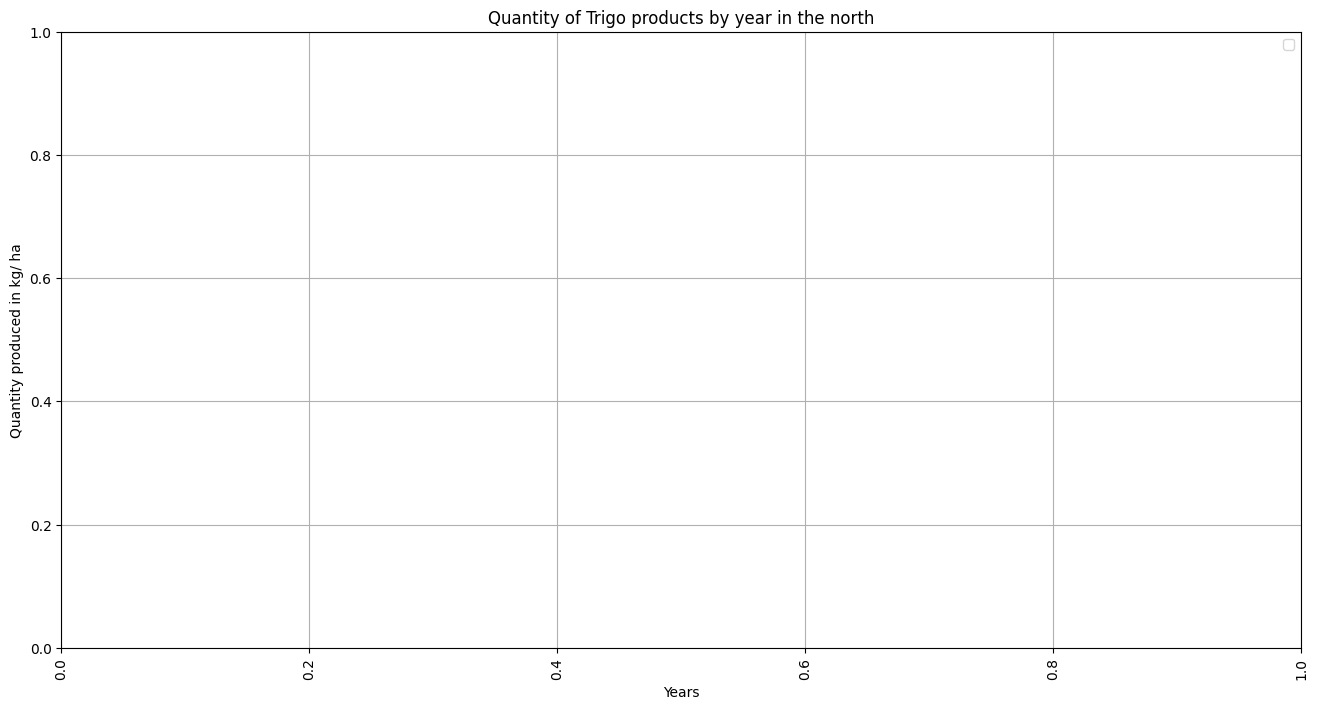

In [79]:
plt.figure(figsize=(16, 8))
for nkey, key in enumerate(data_norte_trigo):
    if nkey > 0:
        plt.plot(data_norte_trigo["year"], data_norte_trigo[key], label=key, marker="o")
plt.grid()
plt.title("Quantity of Trigo products by year in the north")
plt.xlabel("Years")
plt.ylabel("Quantity produced in kg/ ha")
plt.legend()
plt.xticks(rotation="vertical")
plt.show()

In [80]:
# for key in ["Trigo mole", "Trigo duro"]:
#     plt.hist(data_norte_trigo[key], 10, label=key, alpha = 0.7)
# plt.grid()
# plt.title("Histogram of Trigo products in the north")
# plt.xlabel("Quantity produced in kg/ ha")
# plt.ylabel("Amount")
# plt.legend()
# plt.xticks(rotation='vertical')
# plt.show()

- Shet 0 is metadata
- Shet 1 is tmin
- Shet 2 is tmax
- Shet 3 is Pluviosity

### From excel data we have:
Norte: 11=11

Centro: 16=132

Lisboa: 17=320

Alentejo: 18=571

Algarve: 15=554

Açores: 2=360

Madeira: 3=522

In [81]:
excel_list = [11, 132, 320, 571, 554, 360, 522]
code_list = [11, 16, 17, 18, 15, 2, 3]

### Creating the new meteo table
with values of Tmax, TmaxA, Tmin, TminA, Prec corresponding to average maximum temparature, absolute maximum temperature, average minimum temperature, absolute minimum temperature and precipitation

In [82]:
def add_extra_col(type_data, k):
    index_describe = 2
    if k == 3:
        index_describe = 7
        k = 0
    elif k == 4:
        index_describe = 3
        k = 1


    for k2, excel_code in enumerate(excel_list):
        code = code_list[k2]
        meteo2 = pd.read_excel(
            f"./Data/IPMA/{excel_code}-tx-tn-prec.xlsx", sheet_name=(k + 1)
        )
        meteo2.dropna(axis=0, how="any", inplace=True)
        meteo2 = meteo2[meteo2.year > 1986]
        meteo2.set_index("year", inplace=True)
        meteo2.index.names = ["Region"]
        data_prec = meteo2.transpose().describe()
        indexNamesArr = data_prec.index.values
        indexNamesArr[index_describe] = code
        for k_name in indexNamesArr:
            if k_name != code:
                data_prec.drop(index=k_name, inplace=True)

        years_list = data_prec.keys()
        years_list
        header = [years_list, [type_data] * len(years_list)]
        data_prec.columns = header
        data_f = data_prec if k2 == 0 else pd.concat([data_f, data_prec])
    return data_f

In [83]:
ipma = {
    type_data: add_extra_col(type_data, k)
    for k, type_data in enumerate(["Tmin", "Tmax", "Prec", "TmaxA", "TminA"])
}

In [84]:
ipma

{'Tmin': Region      1987      1988      1989      1990      1991      1992      1993  \
             Tmin      Tmin      Tmin      Tmin      Tmin      Tmin      Tmin   
 11      4.568469  4.030819  4.752958  4.807916  4.912407  4.353499  4.072264   
 16      4.101555  3.974269  4.273469  4.241293  4.655638  4.475362  4.118985   
 17      2.643503  3.099071  3.054654  2.986168  3.324872  2.363100  2.717564   
 18      4.841596  4.695673  4.812039  5.010197  5.534852  4.479295  4.207758   
 15      4.026800  4.596784  4.014355  4.381428  4.913778  4.338910  4.056753   
 2       2.659275  2.918943  3.107311  3.018466  3.231790  2.588597  2.596662   
 3       2.467040  2.602737  2.796575  2.851621  2.888221  2.287168  2.415982   
 
 Region      1994      1995      1996  ...      2010      2011      2012  \
             Tmin      Tmin      Tmin  ...      Tmin      Tmin      Tmin   
 11      3.787649  3.895248  4.165406  ...  5.287865  3.886726  4.196100   
 16      4.442519  3.620065  3.47

In [85]:
meteo = pd.concat([ipma["Tmin"], ipma["Tmax"], ipma["Prec"], ipma["TminA"], ipma["TmaxA"]], axis=1)
meteo = meteo.reindex(sorted(meteo.columns), axis=1)
meteo

Region        1987                                                  1988  \
              Prec      Tmax      TmaxA      Tmin      TminA        Prec   
11      136.926798  6.768706  13.100000  4.568469   6.900000  107.198616   
16       57.161421  6.430949  17.570968  4.101555  14.177419   52.925187   
17       85.517315  3.175319  18.900000  2.643503  16.200000   52.869055   
18       68.912823  7.286399  19.386667  4.841596  11.245161   68.190795   
15       80.011243  4.923390  19.646667  4.026800  15.458065  104.371215   
2        82.796997  3.184468  19.200000  2.659275  17.900000   51.636726   
3        75.667693  2.796575  21.000000  2.467040  20.000000   59.295692   

Region                                            ...      2017             \
            Tmax      TmaxA      Tmin      TminA  ...      Tmin      TminA   
11      6.188620  11.300000  4.030819   6.700000  ...  4.276346   7.851613   
16      5.996297  15.470968  3.974269  14.658065  ...  4.136482  15.054839   
17      3.755753  19.600000  3.099071  15.000000  ...       NaN        NaN   
18      6.601232  18.580000  4.695673  10.667742  ...  4.814165  11.496774   
15      5.012162  19.738710  4.596784  16.331034  ...       NaN        NaN   
2       3.456866  19.900000  2.918943  16.300000  ...       NaN        NaN   
3       2.755105  19.400000  2.602737  18.700000  ...  2.547905  19.900000   

Region        2018                                                  2019  \
              Prec      Tmax      TmaxA      Tmin      TminA        Prec   
11      151.983070  7.474769  13.229032  4.949481   7.021429  111.926774   
16       62.457469  6.819466  17.296774  4.311781  15.893548         NaN   
17             NaN       NaN        NaN       NaN        NaN         NaN   
18       98.376853  7.940982  20.764516  5.473375  11.612903         NaN   
15       42.797248  5.033108  21.612903  4.826156  16.200000         NaN   
2              NaN       NaN        NaN       NaN        NaN         NaN   
3        55.442262  2.488702  20.900000  2.514850  18.900000         NaN   

Region                       
            TmaxA      Tmin  
11      12.332258  3.960763  
16            NaN       NaN  
17            NaN       NaN  
18            NaN       NaN  
15            NaN       NaN  
2             NaN       NaN  
3             NaN       NaN  

[7 rows x 163 columns]

In [86]:
meteo= meteo.stack(level=0)
meteo.index.names = ["Region", "Year"]
meteo

Prec      Tmax      TmaxA      Tmin      TminA
Region Year                                                      
11     1987  136.926798  6.768706  13.100000  4.568469   6.900000
       1988  107.198616  6.188620  11.300000  4.030819   6.700000
       1989  180.122157  7.042081  14.800000  4.752958   8.500000
       1990   74.974421  7.237570  14.200000  4.807916   6.200000
       1991   96.020001  7.316523  13.500000  4.912407   5.700000
...                 ...       ...        ...       ...        ...
3      2014   39.904895  2.719779  20.857143  2.675095  19.560714
       2015   38.234384  2.809225  21.400000  2.971175  18.800000
       2016   57.553961  2.732007  21.400000  2.504345  20.000000
       2017   33.865800  2.678704  21.000000  2.547905  19.900000
       2018   55.442262  2.488702  20.900000  2.514850  18.900000

[209 rows x 5 columns]

In [88]:
data

Abacate  Abóbora (inclui butternut)  Alface  Alho  Alho-porro  \
Region year                                                                  
PT     1986      NaN                         NaN     NaN   NaN         NaN   
       1987      NaN                         NaN     NaN   NaN         NaN   
       1988      NaN                         NaN     NaN   NaN         NaN   
       1989      NaN                         NaN     NaN   NaN         NaN   
       1990      NaN                         NaN     NaN   NaN         NaN   
...              ...                         ...     ...   ...         ...   
3      2017      NaN                         NaN     NaN   NaN         NaN   
       2018      0.0                         NaN     NaN   NaN         NaN   
       2019   8243.0                         NaN     NaN   NaN         NaN   
       2020   9164.0                         NaN     NaN   NaN         NaN   
       2021   9726.0                         NaN     NaN   NaN         NaN   

             Ameixa  Amoras  Amêndoa  Ananás   Arroz  ...  Trigo  Trigo duro  \
Region year                                           ...                      
PT     1986  6006.0     NaN    848.0     NaN  4463.0  ...   1630        1250   
       1987  6266.0     NaN    996.0     NaN  4322.0  ...   1694        1355   
       1988  5173.0     NaN    506.0     NaN  4266.0  ...   1380         789   
       1989  5769.0     NaN   1237.0     NaN  4290.0  ...   1915        1197   
       1990  6436.0     NaN   1098.0     NaN  4614.0  ...   1429        1270   
...             ...     ...      ...     ...     ...  ...    ...         ...   
3      2017  7529.0     NaN      0.0     0.0     0.0  ...   1986           0   
       2018  7760.0     0.0      0.0     0.0     0.0  ...   1986           0   
       2019  8339.0     0.0      0.0     0.0     0.0  ...   2002           0   
       2020  5880.0     0.0      0.0     0.0     0.0  ...   1988           0   
       2021  5018.0     0.0      0.0     0.0     0.0  ...   2002           0   

             Trigo mole  Triticale  Uva de mesa  Uva para vinho  \
Region year                                                       
PT     1986        1669       1405         6720            4122   
       1987        1727       1410         7702            5765   
       1988        1425       1237         3179            1965   
       1989        1977       1666         5517            3963   
       1990        1445       1244         5740            5806   
...                 ...        ...          ...             ...   
3      2017        1986          0         7881            5490   
       2018        1986          0         7881            4386   
       2019        2002          0         7881            6224   
       2020        1988          0         7883            5980   
       2021        2002          0         7883            6474   

             Uva para vinho (DOP)  Uva para vinho (IGP)  \
Region year                                               
PT     1986                   NaN                   NaN   
       1987                   NaN                   NaN   
       1988                   NaN                   NaN   
       1989                   NaN                   NaN   
       1990                   NaN                   NaN   
...                           ...                   ...   
3      2017                   NaN                   NaN   
       2018                   NaN                   NaN   
       2019                   NaN                   NaN   
       2020                   NaN                   NaN   
       2021                   NaN                   NaN   

             Uva para vinho (Vinhos sem certificação)  Vinha  
Region year                                                   
PT     1986                                       NaN   4199  
       1987                                       NaN   5824  
       1988                                       NaN   2002  
  

In [111]:
filter_col = ["Trigo", "Trigo duro", "Ananás"]


In [112]:
year = range(1986, 2022)
data_norte_trigo = {
}
for k_col, col in enumerate(filter_col):
    if col not in data_norte_trigo:
        data_norte_trigo[col] = []
    for elem in data[col]["PT"]:
        data_norte_trigo[col].append(elem)
    #     # if k_col == 0:
    #     #     data_norte_trigo["year"].append(elem[0])
    # # region_year = col.index
    # # if region_year[1] not in data_norte_trigo["year"]:
    # #     data_norte_trigo["year"].append(region_year[1])

In [136]:
from sklearn.preprocessing import MinMaxScaler

for key in data_norte_trigo:
    # sg = StandardScaler()
    data_norte_trigo[key] = MinMaxScaler().fit_transform(np.array(data_norte_trigo[key]).reshape(-1, 1))

In [ ]:
data_norte_trigo

{'Trigo': [1630,
  1694,
  1380,
  1915,
  1429,
  2098,
  1291,
  1686,
  1967,
  1387,
  1714,
  1190,
  1015,
  1599,
  1568,
  837,
  1790,
  858,
  1563,
  664,
  2385,
  1863,
  2303,
  1701,
  1430,
  1200,
  1077,
  1764,
  2066,
  2023,
  2357,
  2054,
  2507,
  2610,
  2677,
  2342],
 'Trigo duro': [1250,
  1355,
  789,
  1197,
  1270,
  1798,
  840,
  1550,
  2055,
  1247,
  1661,
  1106,
  1051,
  1532,
  1242,
  769,
  1737,
  787,
  1543,
  559,
  2297,
  1790,
  2348,
  1848,
  1713,
  1362,
  1150,
  1884,
  2341,
  2170,
  2713,
  2261,
  2692,
  2797,
  2839,
  2734],
 'Ananás': [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  27029.0,
  26552.0,
  26939.0,
  25591.0,
  25385.0,
  27969.0,
  27855.0,
  25081.0,
  28097.0,
  26097.0,
  25710.0,
  23919.0,
  22597.0,
  20887.0,
  19746.0,
  19086.0,
  18138.0,
  16915.0,
  16929.0,
  16929.0,
  18200.0,
  18000.0,
  19162.0]}

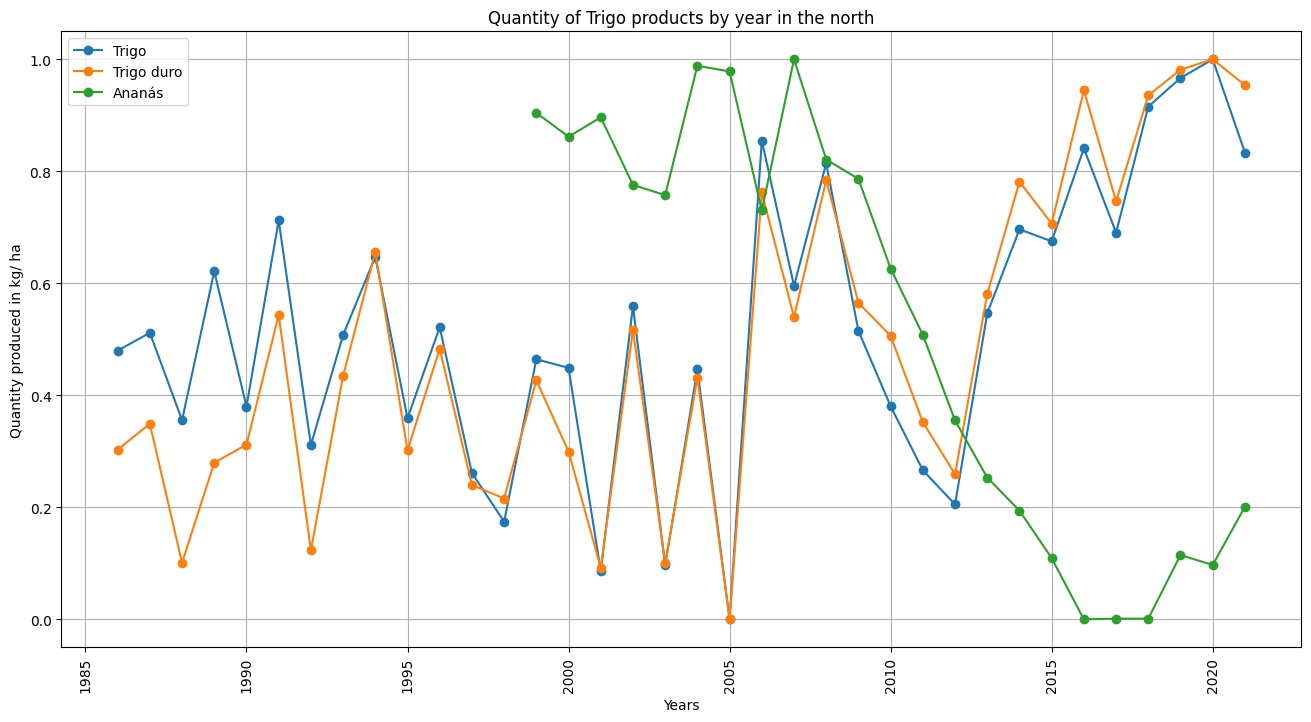

In [137]:
# for key in filter_col:
#     plt.plot(year, data_norte_trigo[key])


plt.figure(figsize=(16, 8))
for key in data_norte_trigo:
    plt.plot(year, data_norte_trigo[key], label=key, marker="o")

plt.grid()
plt.title("Quantity of Trigo products by year in the north")
plt.xlabel("Years")
plt.ylabel("Quantity produced in kg/ ha")
plt.legend()
plt.xticks(rotation="vertical")
plt.show()